In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Admission_Predict.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
df.drop("Serial No.",axis=1,inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [5]:
cond=[(df['Chance of Admit']>=0.85),(df['Chance of Admit']<0.85)]
value=['1','0']
df['Admission']=np.select(cond,value)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admission
0,337,118,4,4.5,4.5,9.65,1,0.92,1
1,324,107,4,4.0,4.5,8.87,1,0.76,0
2,316,104,3,3.0,3.5,8.00,1,0.72,0
3,322,110,3,3.5,2.5,8.67,1,0.80,0
4,314,103,2,2.0,3.0,8.21,0,0.65,0


In [6]:
df.drop('Chance of Admit',axis=1,inplace=True)

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,0
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,0
4,314,103,2,2.0,3.0,8.21,0,0


In [8]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.640516
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.671785
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.648336
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.579188
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.547431
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.695317
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.438027
Admission,0.640516,0.671785,0.648336,0.579188,0.547431,0.695317,0.438027,1.000000


In [9]:
x=df.iloc[:,:-1]
y=df.Admission
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(320, 7)
(80, 7)
(320,)
(80,)


In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(random_state=0,criterion='gini')
classifier.fit(x_train,y_train)
y_pred1=classifier.predict(x_train)
y_pred2=classifier.predict(x_test)

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score


cm_train=confusion_matrix(y_train,y_pred1)
print("Accuracy of Train set:",accuracy_score(y_train,y_pred1))
print("F1 score of Train set:",f1_score(y_train,y_pred1,average='weighted'))
print("Precision of Train set:",precision_score(y_train,y_pred1,average='weighted'))
print(cm_train)


cm_test= confusion_matrix(y_test, y_pred2)
print("Accuracy of Test set:",accuracy_score(y_test,y_pred2))
print("F1 score of Test set:",f1_score(y_test,y_pred2,average='weighted'))
print("Accuracy of Train set:",precision_score(y_test,y_pred2,average='weighted'))
print(cm_test)

Accuracy of Train set: 1.0
F1 score of Train set: 1.0
Precision of Train set: 1.0
[[248   0]
 [  0  72]]
Accuracy of Test set: 0.9
F1 score of Test set: 0.89765625
Accuracy of Train set: 0.8969230769230769
[[60  3]
 [ 5 12]]


[Text(0.6710526315789473, 0.9375, 'x[5] <= 9.165\ngini = 0.349\nsamples = 320\nvalue = [248, 72]'),
 Text(0.5, 0.8125, 'x[5] <= 9.055\ngini = 0.095\nsamples = 260\nvalue = [247, 13]'),
 Text(0.3157894736842105, 0.6875, 'x[0] <= 330.0\ngini = 0.033\nsamples = 237\nvalue = [233, 4]'),
 Text(0.2631578947368421, 0.5625, 'x[5] <= 8.92\ngini = 0.025\nsamples = 236\nvalue = [233, 3]'),
 Text(0.10526315789473684, 0.4375, 'x[4] <= 4.75\ngini = 0.009\nsamples = 215\nvalue = [214, 1]'),
 Text(0.05263157894736842, 0.3125, 'gini = 0.0\nsamples = 209\nvalue = [209, 0]'),
 Text(0.15789473684210525, 0.3125, 'x[1] <= 109.0\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.10526315789473684, 0.1875, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.21052631578947367, 0.1875, 'x[3] <= 3.75\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.15789473684210525, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2631578947368421, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.421

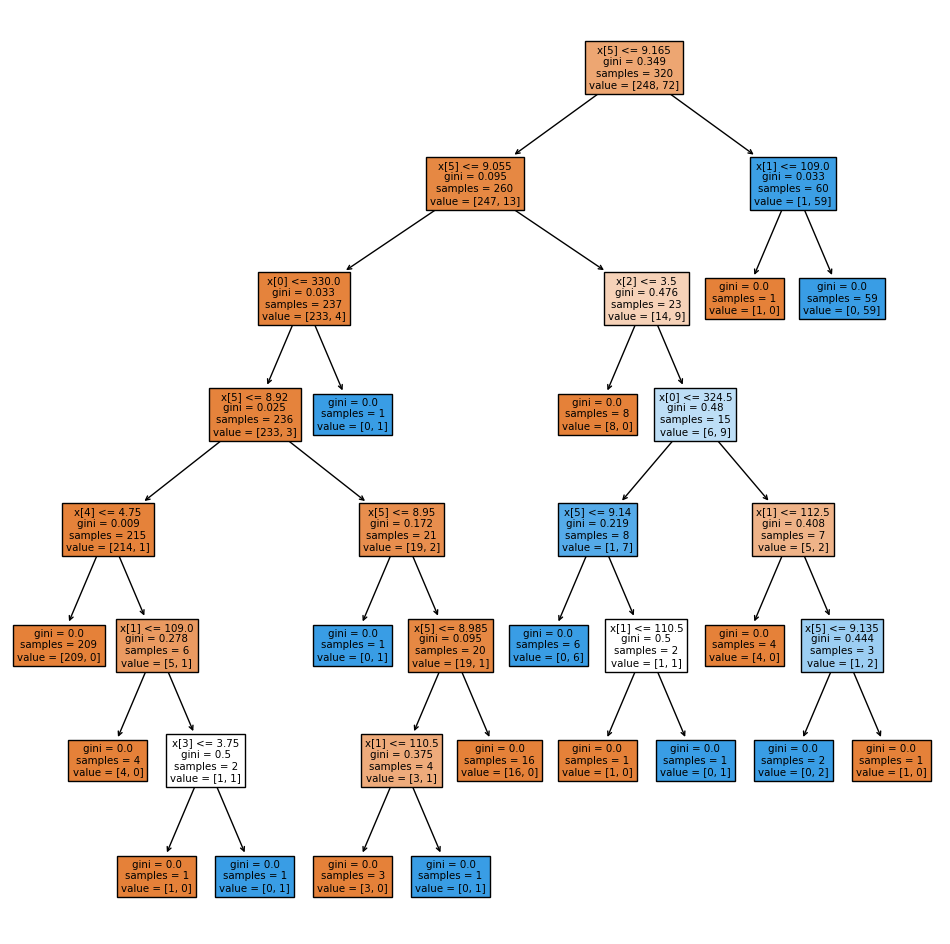

In [12]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,12))
plot_tree(classifier,filled = True)

In [13]:
classifier1=DecisionTreeClassifier(random_state=0,criterion='entropy')

classifier1.fit(x_train,y_train)
y_pred_1=classifier1.predict(x_train)
y_pred_2=classifier1.predict(x_test)

[Text(0.5909090909090909, 0.9, 'x[5] <= 9.165\nentropy = 0.769\nsamples = 320\nvalue = [248, 72]'),
 Text(0.36363636363636365, 0.7, 'x[5] <= 8.92\nentropy = 0.286\nsamples = 260\nvalue = [247, 13]'),
 Text(0.18181818181818182, 0.5, 'x[4] <= 4.75\nentropy = 0.043\nsamples = 215\nvalue = [214, 1]'),
 Text(0.09090909090909091, 0.3, 'entropy = 0.0\nsamples = 209\nvalue = [209, 0]'),
 Text(0.2727272727272727, 0.3, 'x[1] <= 109.0\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]'),
 Text(0.18181818181818182, 0.1, '\n  (...)  \n'),
 Text(0.36363636363636365, 0.1, '\n  (...)  \n'),
 Text(0.5454545454545454, 0.5, 'x[4] <= 3.75\nentropy = 0.837\nsamples = 45\nvalue = [33, 12]'),
 Text(0.45454545454545453, 0.3, 'entropy = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.6363636363636364, 0.3, 'x[1] <= 108.5\nentropy = 0.991\nsamples = 27\nvalue = [15, 12]'),
 Text(0.5454545454545454, 0.1, '\n  (...)  \n'),
 Text(0.7272727272727273, 0.1, '\n  (...)  \n'),
 Text(0.8181818181818182, 0.7, 'x[1] <= 109.0\nent

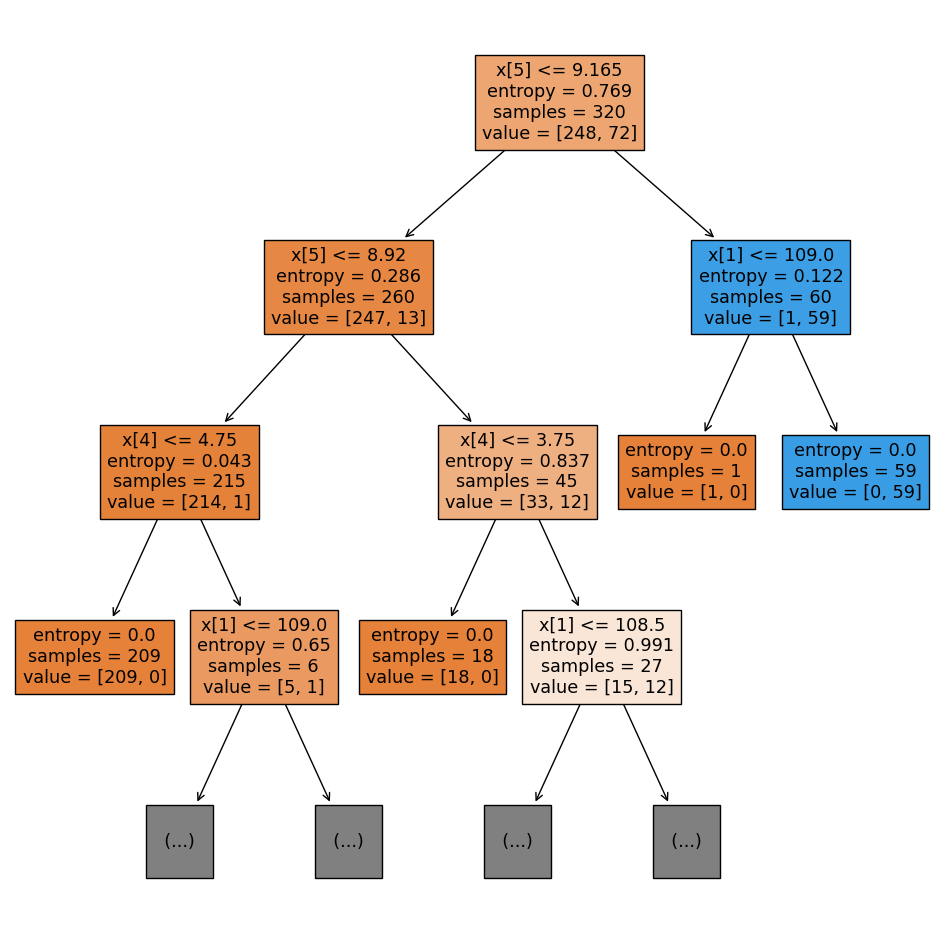

In [14]:
plt.figure(figsize=(12,12))
plot_tree(classifier1,max_depth=3,filled =True)


In [15]:
cm_train=confusion_matrix(y_train,y_pred_1)
print("Accuracy of Train set:",accuracy_score(y_train,y_pred_1))
print("F1 score of Train set:",f1_score(y_train,y_pred_1,average='weighted'))
print("Precision of Train set:",precision_score(y_train,y_pred_1,average='weighted'))
print(cm_train)


cm_test= confusion_matrix(y_test, y_pred_2)
print("Accuracy of Test set:",accuracy_score(y_test,y_pred_2))
print("F1 score of Test set:",f1_score(y_test,y_pred_2,average='weighted'))
print("Accuracy of Train set:",precision_score(y_test,y_pred_2,average='weighted'))
print(cm_test)

Accuracy of Train set: 1.0
F1 score of Train set: 1.0
Precision of Train set: 1.0
[[248   0]
 [  0  72]]
Accuracy of Test set: 0.95
F1 score of Test set: 0.948828125
Accuracy of Train set: 0.9494871794871795
[[62  1]
 [ 3 14]]
